In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

%matplotlib inline

In [ ]:
loan_data = pd.read_csv('/content/drive/My Drive/House_loan_project/loan_data (1).csv')

In [ ]:
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
loan_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [ ]:
loan_data.shape

(307511, 122)

In [ ]:
loan_data.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64'),
       dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'),
       dtype('float64'), dtype('int64'), dtype('int64'), dtype('O'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
 

In [ ]:
le = LabelEncoder()

In [ ]:
#convert string category values into numerical labels
loan_data['NAME_CONTRACT_TYPE'] = le.fit_transform(loan_data['NAME_CONTRACT_TYPE'].values)
loan_data['CODE_GENDER'] = le.fit_transform(loan_data['CODE_GENDER'].values)
loan_data['FLAG_OWN_CAR'] = le.fit_transform(loan_data['FLAG_OWN_CAR'].values)
loan_data['FLAG_OWN_REALTY'] = le.fit_transform(loan_data['FLAG_OWN_REALTY'].values)
loan_data['NAME_TYPE_SUITE'] = le.fit_transform(loan_data['NAME_TYPE_SUITE'].astype(str))
loan_data['NAME_INCOME_TYPE'] = le.fit_transform(loan_data['NAME_INCOME_TYPE'].astype(str))
loan_data['NAME_EDUCATION_TYPE'] = le.fit_transform(loan_data['NAME_EDUCATION_TYPE'].astype(str))
loan_data['NAME_FAMILY_STATUS'] = le.fit_transform(loan_data['NAME_FAMILY_STATUS'].astype(str))
loan_data['NAME_HOUSING_TYPE'] = le.fit_transform(loan_data['NAME_HOUSING_TYPE'].astype(str))
loan_data['OCCUPATION_TYPE'] = le.fit_transform(loan_data['OCCUPATION_TYPE'].astype(str))
loan_data['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(loan_data['WEEKDAY_APPR_PROCESS_START'].values)
loan_data['ORGANIZATION_TYPE'] = le.fit_transform(loan_data['ORGANIZATION_TYPE'].values)
loan_data['FONDKAPREMONT_MODE'] = le.fit_transform(loan_data['FONDKAPREMONT_MODE'].astype(str))
loan_data['HOUSETYPE_MODE'] = le.fit_transform(loan_data['HOUSETYPE_MODE'].astype(str))
loan_data['WALLSMATERIAL_MODE'] = le.fit_transform(loan_data['WALLSMATERIAL_MODE'].astype(str))
loan_data['EMERGENCYSTATE_MODE'] = le.fit_transform(loan_data['EMERGENCYSTATE_MODE'].astype(str))

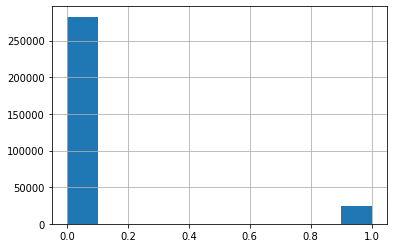

In [ ]:
loan_data['TARGET'].hist()

In [ ]:
#The data is highly biased towards target 0 .so we should downample it to get accurate results
data_undersampled = loan_data.drop(loan_data.query('TARGET == 0').sample(frac = 0.90).index)

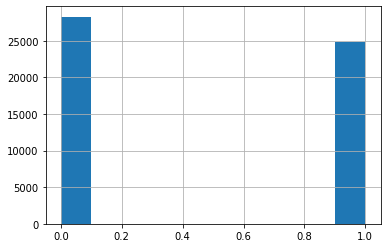

In [ ]:
data_undersampled['TARGET'].hist()

In [ ]:
data_undersampled.shape

(53094, 122)

In [ ]:
data_undersampled.columns[data_undersampled.isna().any()].tolist

<bound method IndexOpsMixin.tolist of Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
#fill missing value of each coloumn with most freequent value in acoloumn
data = imputer.fit_transform(data_undersampled)

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data.columns = data_undersampled.columns

In [ ]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,0.0,1.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,6.0,7.0,4.0,3.0,1.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,7.0,1.0,1.0,0.0,1.0,1.0,0.0,8.0,1.0,2.0,2.0,6.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0205,0.0193,0.0,0.0,3.0,0.0,0.0149,5.0,0.0,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100004.0,0.0,1.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,135000.0,6.0,7.0,4.0,3.0,1.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,8.0,1.0,2.0,2.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0513,0.0000,0.0,0.0,0.0,1.0,0.0000,7.0,2.0,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100020.0,0.0,0.0,1.0,0.0,0.0,0.0,108000.0,509602.5,26149.5,387000.0,6.0,7.0,4.0,1.0,1.0,0.018634,-12931.0,-1317.0,-6392.0,-3866.0,7.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,2.0,2.0,2.0,4.0,12.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0513,0.0000,0.0,0.0,0.0,1.0,0.0000,7.0,2.0,0.0,0.0,0.0,0.0,-3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,100031.0,1.0,0.0,0.0,0.0,1.0,0.0,112500.0,979992.0,27076.5,702000.0,6.0,7.0,4.0,5.0,1.0,0.018029,-18724.0,-2628.0,-6573.0,-1827.0,7.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,2.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0513,0.0096,0.0,0.0,0.0,0.0,0.0085,6.0,1.0,10.0,1.0,10.0,0.0,-161.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
4,100041.0,0.0,0.0,0.0,0.0,0.0,0.0,112500.0,450000.0,44509.5,450000.0,6.0,7.0,1.0,1.0,1.0,0.008575,-12158.0,-1275.0,-6265.0,-2009.0,7.0,1.0,1.0,1.0,1.0,1.0,0.0,14.0,2.0,2.0,2.0,1.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0513,0.0592,0.0,0.0,3.0,0.0,0.0749,5.0,0.0,0.0,0.0,0.0,0.0,-1285.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

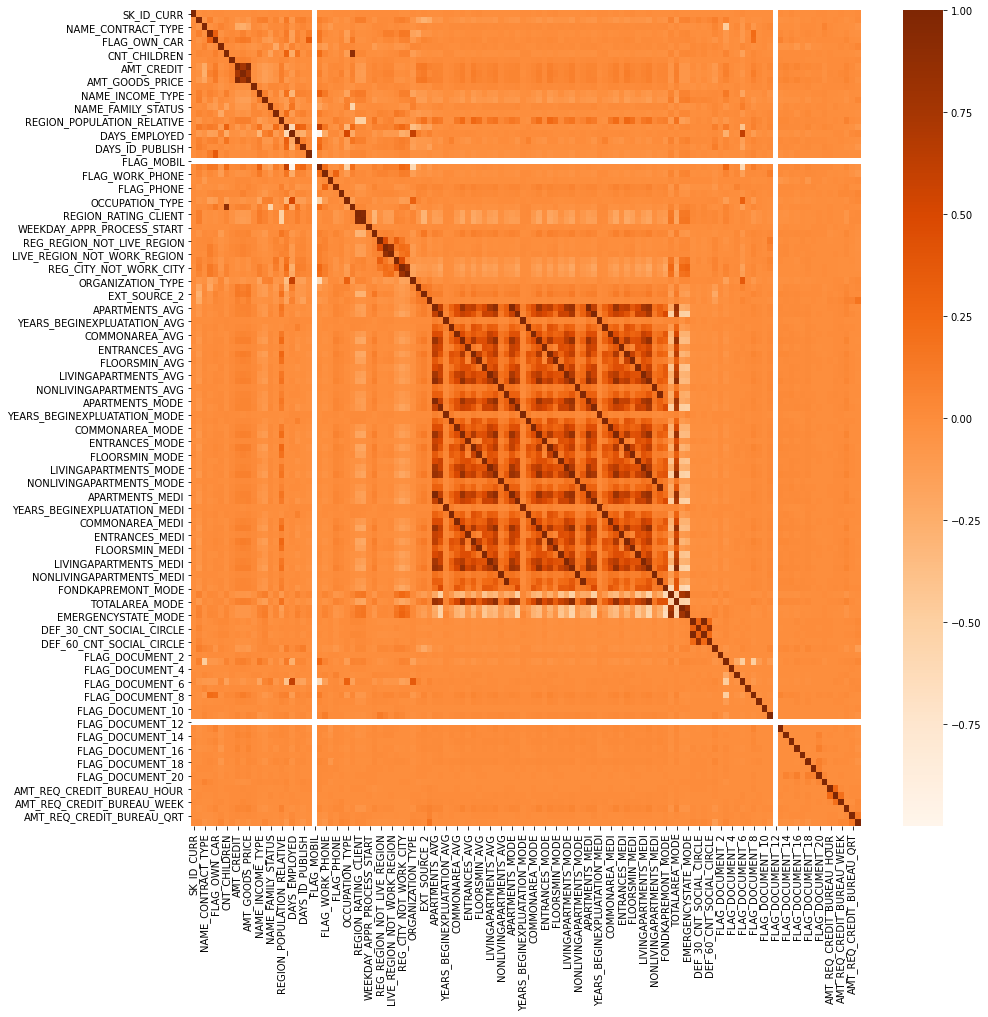

In [ ]:
figure = plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), cmap = 'Oranges')

In [ ]:
#we cant find corelated pairs from this heatmap.so we use another way
c_matrix = data.corr().abs()
sorted_corr_pairs = c_matrix.unstack().sort_values(kind = 'quicksort', ascending = False)
sorted_corr_pairs[322:352]

LIVINGAREA_MODE        BASEMENTAREA_MEDI        0.731749
BASEMENTAREA_MEDI      LIVINGAREA_MODE          0.731749
LIVINGAREA_MODE        BASEMENTAREA_AVG         0.729171
BASEMENTAREA_AVG       LIVINGAREA_MODE          0.729171
WALLSMATERIAL_MODE     HOUSETYPE_MODE           0.728820
HOUSETYPE_MODE         WALLSMATERIAL_MODE       0.728820
APARTMENTS_MODE        LIVINGAPARTMENTS_MEDI    0.727762
LIVINGAPARTMENTS_MEDI  APARTMENTS_MODE          0.727762
BASEMENTAREA_AVG       TOTALAREA_MODE           0.724711
TOTALAREA_MODE         BASEMENTAREA_AVG         0.724711
BASEMENTAREA_MEDI      TOTALAREA_MODE           0.723693
TOTALAREA_MODE         BASEMENTAREA_MEDI        0.723693
LIVINGAREA_AVG         LIVINGAPARTMENTS_MEDI    0.723411
LIVINGAPARTMENTS_MEDI  LIVINGAREA_AVG           0.723411
LIVINGAPARTMENTS_AVG   APARTMENTS_MODE          0.721865
APARTMENTS_MODE        LIVINGAPARTMENTS_AVG     0.721865
LIVINGAREA_AVG         LIVINGAPARTMENTS_AVG     0.720214
LIVINGAPARTMENTS_AVG   LIVINGAR

In [ ]:
column_drop = '''FLOORSMIN_AVG,
TOTALAREA_MODE,
LIVINGAPARTMENTS_MEDI,
LIVINGAPARTMENTS_AVG,
NONLIVINGAPARTMENTS_AVG,
FLOORSMAX_AVG,
ENTRANCES_AVG,
ELEVATORS_MEDI,
BASEMENTAREA_AVG,
YEARS_BEGINEXPLUATATION_AVG,
APARTMENTS_AVG,
NONLIVINGAPARTMENTS_MEDI,
COMMONAREA_AVG,
NONLIVINGAREA_AVG,
FLAG_EMP_PHONE,
DAYS_EMPLOYED,
YEARS_BUILD_AVG,
OBS_60_CNT_SOCIAL_CIRCLE,
FLOORSMIN_AVG,
AMT_CREDIT,
LIVINGAPARTMENTS_MEDI,
BASEMENTAREA_AVG,
ELEVATORS_AVG,
COMMONAREA_AVG,
ENTRANCES_MODE,
APARTMENTS_MODE,
LANDAREA_AVG,
NONLIVINGAREA_MODE,
YEARS_BEGINEXPLUATATION_MODE,
LIVINGAPARTMENTS_MODE,
ENTRANCES_MODE,
APARTMENTS_AVG,
YEARS_BEGINEXPLUATATION_MODE,
NONLIVINGAREA_AVG,
LIVINGAREA_MEDI,
REGION_RATING_CLIENT,
TOTALAREA_MODE,
LIVINGAREA_MODE,
LIVINGAREA_AVG,
APARTMENTS_MEDI,
CNT_FAM_MEMBERS,
REG_REGION_NOT_WORK_REGION,
REG_CITY_NOT_WORK_CITY,
WALLSMATERIAL_MODE,
AMT_ANNUITY,
DEF_30_CNT_SOCIAL_CIRCLE,
SK_ID_CURR,
LIVINGAPARTMENTS_AVG'''

column_list = column_drop.replace('\n', '').split(',')
len(column_list)
data_final = data.drop(columns = column_list)





In [ ]:
data_final.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,BASEMENTAREA_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,...,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1.0,0.0,1.0,0.0,1.0,0.0,202500.0,351000.0,6.0,7.0,4.0,3.0,1.0,0.018801,-9461.0,-3648.0,-2120.0,7.0,1.0,0.0,1.0,1.0,0.0,8.0,2.0,6.0,10.0,0.0,0.0,0.0,0.0,5.0,0.083037,0.262949,0.139376,0.0383,0.6341,0.0144,0.0,0.0833,...,0.9722,0.6243,0.0144,0.0690,0.0833,0.1250,0.0375,0.0,3.0,0.0,0.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6.0,7.0,4.0,3.0,1.0,0.010032,-19046.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,0.0,8.0,2.0,1.0,9.0,0.0,0.0,0.0,0.0,11.0,0.384768,0.555912,0.729567,0.0000,0.7452,0.0000,0.0,0.1667,...,0.9806,0.7383,0.0000,0.1379,0.1667,0.2083,0.0000,0.0,0.0,1.0,2.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,108000.0,387000.0,6.0,7.0,4.0,1.0,1.0,0.018634,-12931.0,-6392.0,-3866.0,7.0,1.0,0.0,1.0,0.0,0.0,4.0,2.0,4.0,12.0,0.0,0.0,1.0,0.0,11.0,0.384768,0.236378,0.062103,0.0000,0.7452,0.0000,0.0,0.1667,...,0.9806,0.7383,0.0000,0.1379,0.1667,0.2083,0.0000,0.0,0.0,1.0,2.0,0.0,0.0,-3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,112500.0,702000.0,6.0,7.0,4.0,5.0,1.0,0.018029,-18724.0,-6573.0,-1827.0,7.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,9.0,0.0,0.0,0.0,0.0,5.0,0.384768,0.548477,0.190706,0.0092,0.7452,0.0000,0.0,0.0417,...,0.9732,0.7383,0.0000,0.0690,0.0417,0.2083,0.0270,0.0,0.0,0.0,1.0,10.0,0.0,-161.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,112500.0,450000.0,6.0,7.0,1.0,1.0,1.0,0.008575,-12158.0,-6265.0,-2009.0,7.0,1.0,1.0,1.0,1.0,0.0,14.0,2.0,1.0,19.0,0.0,0.0,0.0,0.0,42.0,0.384768,0.663158,0.678568,0.0822,0.8171,0.0000,0.0,0.1667,...,0.9861,0.8121,0.0000,0.1724,0.1667,0.2083,0.0903,0.0,3.0,0.0,0.0,0.0,0.0,-1285.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_data = data_final.drop('TARGET', axis = 1)
y_data = data_final['TARGET']

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.33, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_dim = X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train,
        epochs=300,
        validation_split=0.2,
        batch_size = 500,
        #callbacks = callbacks,
        verbose=2)

Epoch 1/300
57/57 - 1s - loss: 0.6593 - accuracy: 0.6079 - val_loss: 0.7027 - val_accuracy: 0.5830
Epoch 2/300
57/57 - 1s - loss: 0.6590 - accuracy: 0.6054 - val_loss: 0.7223 - val_accuracy: 0.5796
Epoch 3/300
57/57 - 1s - loss: 0.6586 - accuracy: 0.6084 - val_loss: 0.7182 - val_accuracy: 0.5824
Epoch 4/300
57/57 - 1s - loss: 0.6590 - accuracy: 0.6069 - val_loss: 0.6990 - val_accuracy: 0.5817
Epoch 5/300
57/57 - 1s - loss: 0.6587 - accuracy: 0.6057 - val_loss: 0.6904 - val_accuracy: 0.5837
Epoch 6/300
57/57 - 1s - loss: 0.6594 - accuracy: 0.6065 - val_loss: 0.7167 - val_accuracy: 0.5796
Epoch 7/300
57/57 - 1s - loss: 0.6596 - accuracy: 0.6086 - val_loss: 0.6857 - val_accuracy: 0.5876
Epoch 8/300
57/57 - 1s - loss: 0.6581 - accuracy: 0.6085 - val_loss: 0.6729 - val_accuracy: 0.5893
Epoch 9/300
57/57 - 1s - loss: 0.6589 - accuracy: 0.6059 - val_loss: 0.6810 - val_accuracy: 0.5847
Epoch 10/300
57/57 - 1s - loss: 0.6586 - accuracy: 0.6059 - val_loss: 0.6718 - val_accuracy: 0.5892
Epoch 11/

In [ ]:
pred = np.asarray(model.predict(X_test), dtype = float)

In [ ]:
pred_class = np.round(pred)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
score = accuracy_score(y_test, pred_class)
sensitivity = recall_score(y_test, pred_class)
area_roc = roc_auc_score(y_test, pred_class)
print('accuracy of model : ',score)
print('sensitivity :', sensitivity )
print('area_under_ROC : ', area_roc)

accuracy of model :  0.5899440703116082
sensitivity : 0.5035348610433935
area_under_ROC :  0.5847788063534204
